In [1]:
import sys, os
import datetime
from settings import *

sys.path.insert(0, PYSBF_PATH)
from pysbf import *


from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

import IPython
IPython.display.HTML('<style> select, textarea, input { font-family: Courier New; } </style>')


## Set galaxy name

In [2]:
name = "u12517"

In [3]:
IN_FOLDER, OUT_FOLDER

('/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/')

In [4]:
outFolder = OUT_FOLDER + "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

df_log = open_log_df(logFile)
uuid = df_log.at["uuid", "value"]

X0 = int(float(df_log.at["X0", "value"])) # Object Center X0 [pixel]
Y0 = int(float(df_log.at["Y0", "value"])) # Object Center X0 [pixel]
XX = int(float(df_log.at["X_pixels", "value"]))
YY = int(float(df_log.at["Y_pixels", "value"]))
# _ = Logtext(logFile, "log file")

# df_log

- not different by a lot
- model pswf --> blur psf
- trying multiple psf --> averaging out the results, or using them for error measuremnt
- combinedj.on.bright.psf.14219 sharpest one, good starting 
- PSFstd --> mode l psf from space teelscope
- PSF = inFolder+"/psflibrary/PSFSTD_WFC3IR_F110W.fits"

In [5]:
PSF = IN_FOLDER+"/psflibrary/combinedj.on.psf.14654"  # --> refer to the project
PSF = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/e137024/e137j.psf3"

In [6]:
! ls {IN_FOLDER}"/psflibrary/combined*"

ls: cannot access '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combined*': No such file or directory


In [7]:
import glob

psf_list = glob.glob(IN_FOLDER+"/psflibrary/combinedj*")
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

point source mask, comes from likenew6 (tuned for infrared bands)

- ptm6 default output of likenew: sometimes misses objects that are super bright
- ptm6b --> produced after further manipulations

In [8]:
DIR = "{}{}_{}/".format(outFolder, name, uuid)

config = {
    "DIR": DIR,
    "PSF": PSF,
    "PRF": "model.000",
    "RSD": "resid.000",
#     "PTM": "{}_se_lknjj.ptm6b".format(name),
    "PTM": "{}/hybridj.ptm6b".format(DIR),
    }

W = SBF_widgets(XX, YY, X0, Y0, **config)

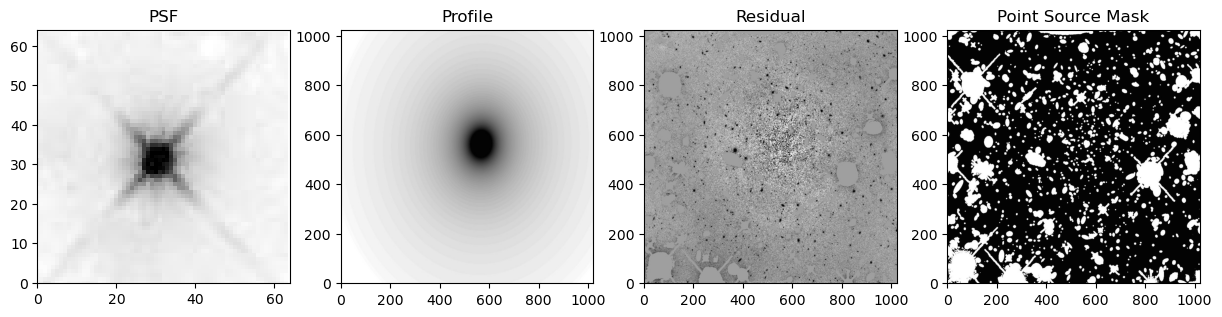

In [9]:
_ = eval_plots(config)

In [10]:
W.settings()

In [11]:
# <g> = 19695.7   # the average of galaxy brightness in that anulus
# <r> =  99.5     # the average radius in that anulus

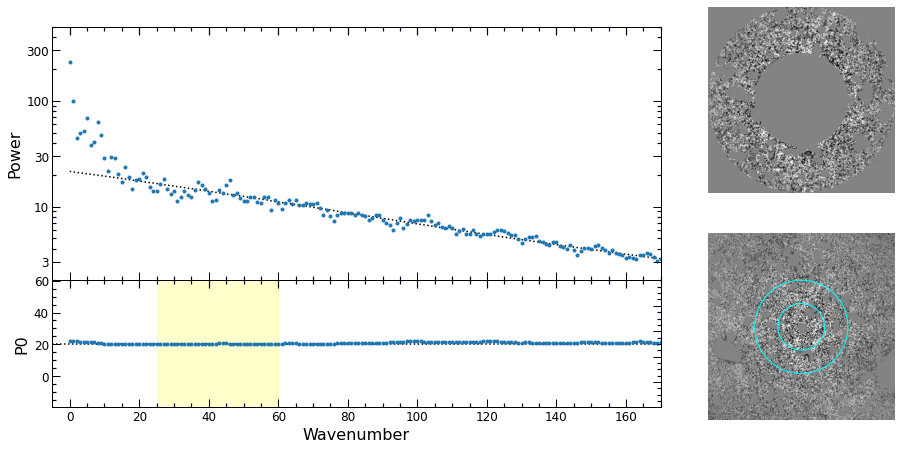

In [12]:
(ax1, ax2, ax3, ax4), psf_info, P0 = W.get_sbf()
# ax2.set_ylim(130, 140)

## PSF power spectrum

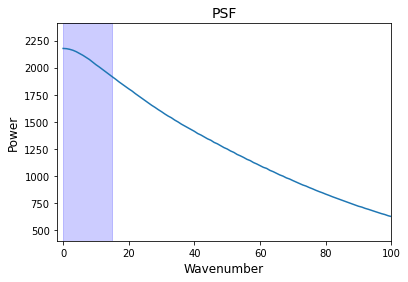

In [12]:
ax = plot_psf_power(psf_info, K_upper_limit = 100)

In [13]:
W.get_sbf_all(angle_range=(10,180))

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.6, 0.563), 'c1': (21.07, 0.19), 'c2': (15.53, 0.145)}

In [14]:
# P0, dP0
W.get_sbf_all()

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.06, 0.352), 'c1': (20.22, 0.159), 'c2': (15.61, 0.158)}

In [15]:
len(psf_list)

6

In [16]:
W.get_sbf_iter(n_iter=50, psf_list=psf_list)

{'iter000': {'P0': (20.16, 0.183),
  'K': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
          11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
          22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
          33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
          44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
          55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
          66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
          77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
          88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
          99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
         110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
         121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
         132., 133., 134., 135., 136., 137., 138., 139., 140


 Welcome to monsta (libvista svn rn/a, 221026)

 >> rd 1 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654'                   ! reading psf from library
 >> rd 2 'model.000'    
 >> rd 3 'resid.000'      
 >> d 5 'u12517_se_lknjj.ptm6b' bitmap        
 D is not a Unix VISTA command...
 >> rd 5 'u12517_se_lknjj.ptm6b' bitmap        
 >> mi 3 5
 >> cop 4 1
 >> open 6 nr=1024 nc=1024
 >> fluc 6 5 mask x0=567 y0=562 r0=64 r1=128 a0=0 a1=360
Unity = 0.031     Average radius =    99.6
 >> cop 7 6
 >> mi 7 3 
 >> tv 7
Autoscaling: threshold =  -673.480         saturation =   781.330    
 >> fluc 6 2 window  
Residual radius =    99.6     m_res =  0.00
Unity = 0.031     Galaxy average = 19725.3
 >> tv 6 
Autoscaling: threshold =   109.308         saturation =   195.828    
 >> fluc 6 4 expect order=4 k0=0 k1=15 
 PSF scaled by 7.503E+08
 >> tv 4 
Autoscaling: threshold =  2.420572E-02     saturation =  0.739858    
 >> fft 8 7 
 >> power 9 8 
 >> tv 4 
Autoscaling: threshold =  2.420572E-02     saturation =  0.739858    
 >> tv 9 
Autoscaling: threshold =  2.115418E+07     saturation =  3.740269E+10
 >> fluc 4 4 fit 
 Mongo commands: power, p0, fluc, etc
 1:k 2:E 3:D 4:Efit 5:R 6:P0 7:P1 8:dP0 9:dP1 10:rms 11:Chi/n
 Enter lowest fit wavenumber (-1:plot/-2:exit):  >> 0
 Enter highest fit wavenumber (-1:plot/-2:exit):  >> 20
 Averaging fits from wavenumbers           0          20
 P0 =  1.000E+00 +/-  0.00        P1 = -0.00 +/- 0.00     (-1.918E-11)
 rms in P0 =      0.00        Fit range =   0  20     Correlation r = 0.9958
 Enter lowest fit wavenumber (-1:plot/-2:exit):  >> -1
 * tern
 Unknown command - 'tern                '
 * term
 * power 
 * limits -10 70 -8 -5.9
 * power 
 * limits -10 70 -8 -5.9 
 * point
 * erase 
 * point


In [11]:
32 - 64 - ... - 512
c0 [galaxy is bright Pr is high]  - <c1> [usually the best]- ?<c2> - c3 [almost get rejected, background]

dc0, dc1, ...

dP0

SyntaxError: invalid syntax (<ipython-input-11-dee4440684a0>, line 2)

In [ ]:
! cat monsta.log

In [ ]:
output 
C0
...
..
.


In [ ]:
fter this step


- bestfluc sej/doj (probably the hybrid option is enough)

inputs : C0 C1 ....
    and lkn6 files

In [ ]:
bestfluc outputs  + PS (g-z)   --> distance

In [ ]:
psf
psf uncertwinasty due to PSF and sky uncertaiunty
fitting range . 90% of time 25-50 but we want to change that when it looks bad



In [ ]:
narrow range of radii,
residual rms
crossing elliupse and extend it gradually until the rms blows-up


In [ ]:
run the same thing for different psf
changing the sky background  --> add/subtract to/from the residual image
